# Test - moving targets - CompetitiveGrid

In [9]:
import shutil
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import explorationlib
from explorationlib.agent import Diffusion2d
from explorationlib.agent import DiffusionDiscrete
from explorationlib.agent import DiffusionCardinal

from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import constant_values
from explorationlib.local_gym import CompetitiveGrid

from explorationlib.run import multi_experiment
from explorationlib.util import select_exp
from explorationlib.util import select_agent
from explorationlib.util import load
from explorationlib.util import save

from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_positions2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

from explorationlib import score
from explorationlib.score import search_efficiency
from explorationlib.score import first_reward
from explorationlib.score import average_reward
from explorationlib.score import total_reward

<IPython.core.display.Javascript object>

In [10]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

# 1 pred, 2 preys

In [31]:
# How long to run? Longer is better, but slower.
num_steps = 100
num_experiments = 15

num_agents = 20
num_targets = 10
target_index = list(range(0, num_targets))

detection_radius =  1
p_target = 0.1
target_boundary = (10, 10)

# -
min_length = 1
step_size = 1

# Create env 
env = CompetitiveGrid(num_agents=num_agents, mode=None)
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1.0)

# Preds and preys
scale = 1
agents = [DiffusionCardinal(scale=scale) for _ in range(num_agents)]

# Intial targets
env.add_targets(target_index, targets, values, detection_radius=detection_radius)

# !
comp_exp = multi_experiment(
    f"test_comp",
    agents, 
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    seed=404,
    split_state=False,
    dump=False
)

test_comp: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]


<IPython.core.display.Javascript object>

In [32]:
print(f">>> Target index : {target_index}")

>>> Target index : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<IPython.core.display.Javascript object>

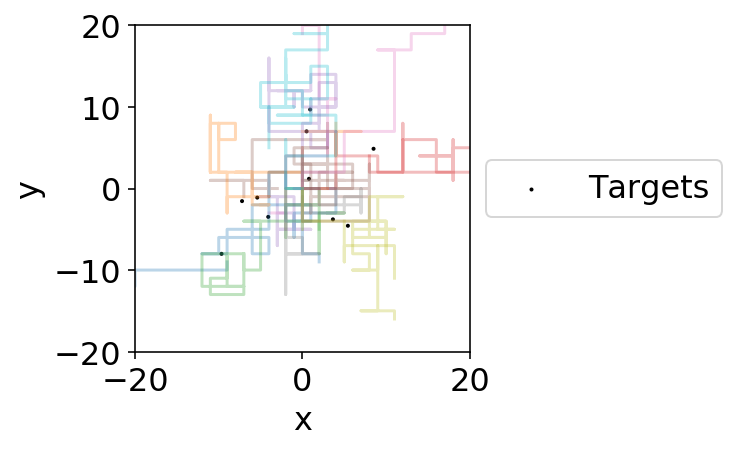

<IPython.core.display.Javascript object>

In [33]:
num_experiment = 0
num_agent = 0
plot_boundary = (20, 20)

# Example bout
ax = None
ax = plot_positions2d(
    select_exp(comp_exp, num_experiment),
    num_agents,
    boundary=plot_boundary,
    # labels=["Prey 1", "Prey 2", "Pred"],
    colors=None,
    alpha=0.3,
    figsize=(3, 3),
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

In [34]:
total_reward(comp_exp)

total_reward: 100%|██████████| 15/15 [00:00<00:00, 3934.62it/s]


[9.0, 9.0, 8.0, 9.0, 8.0, 9.0, 7.0, 9.0, 8.0, 10.0, 7.0, 6.0, 8.0, 6.0, 9.0]

<IPython.core.display.Javascript object>

In [35]:
sorted(env.dead)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

<IPython.core.display.Javascript object>